In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deepMacroFin import PDEModel
from deepMacroFin import Comparator, EndogVar, EndogVarConditions, EndogEquation

## Model 1
$$\frac{\partial x}{\partial t} = 2 * t, x(0)=1$$
Solution: $x(t)=t^2 + 1$

In [2]:
pde_model1 = PDEModel("simple_de1")
pde_model1.set_state(["t"], {"t": [-2., 2.]})
pde_model1.add_endog("x")
pde_model1.add_endog_equation(r"$\frac{\partial x}{\partial t} = 2 * t$", label="base_ode")
pde_model1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(pde_model1)
# if not os.path.exists("./models/simple_de1.pt"):
#     pde_model.train_model("./models", "simple_de1.pt", True)
# else:
#     pde_model.load_model(torch.load("./models/simple_de1.pt"))
#     pde_model.eval_model()
pde_model1.train_model("./models", "simple_de1.pt", True)

==========================Summary of Model simple_de1===========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias=True)
    (activation_3): Tanh()
    (final_layer): Linear(in_features=30, out_f

100%|██████████| 1000/1000 [00:04<00:00, 240.72it/s]

training finished, total time :: 4.158277273178101
Model saved to ./models/simple_de1.pt


OrderedDict([('endogeq_base_ode', tensor(0.0002, grad_fn=<MeanBackward0>)),
             ('endogvar_x_cond_initial_condition',
              tensor(1.1708e-05, grad_fn=<MeanBackward0>)),
             ('total_loss', tensor(0.0003, grad_fn=<AddBackward0>))])

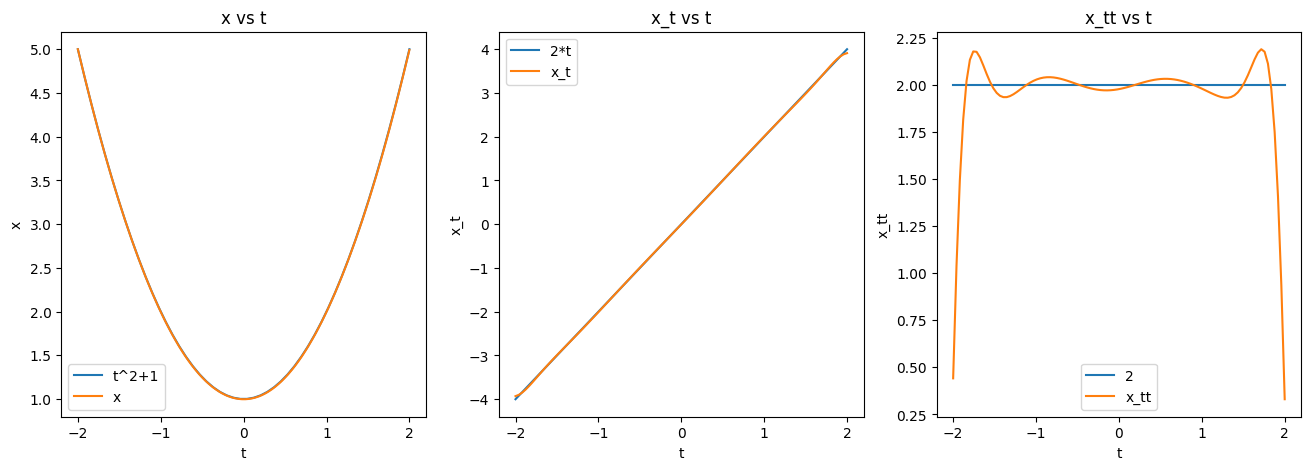

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
t = np.linspace(-2, 2)
ax[0].plot(t, t**2+1, label="t^2+1")
ax[1].plot(t, 2*t, label="2*t")
ax[2].plot(t, np.ones_like(t) * 2, label="2")
pde_model1.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
pde_model1.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
pde_model1.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Model 2
$$\frac{\partial x}{\partial t} = x, x(0)=1$$
Solution: $x(t)=e^t$

In [4]:
pde_model2 = PDEModel("simple_de2")
pde_model2.set_state(["t"], {"t": [-2., 2.]})
pde_model2.add_endog("x")
pde_model2.add_endog_equation("x_t=x", label="base_ode")
pde_model2.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(pde_model2)
# if not os.path.exists("./models/simple_de2.pt"):
#     pde_model.train_model("./models", "simple_de2.pt", True)
# else:
#     pde_model.load_model(torch.load("./models/simple_de2.pt"))
#     pde_model.eval_model()
pde_model2.train_model("./models", "simple_de2.pt", True)

==========================Summary of Model simple_de2===========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias=True)
    (activation_3): Tanh()
    (final_layer): Linear(in_features=30, out_f

100%|██████████| 1000/1000 [00:05<00:00, 195.84it/s]

training finished, total time :: 5.116638660430908
Model saved to ./models/simple_de2.pt


OrderedDict([('endogeq_base_ode', tensor(0.0096, grad_fn=<MeanBackward0>)),
             ('endogvar_x_cond_initial_condition',
              tensor(0.0003, grad_fn=<MeanBackward0>)),
             ('total_loss', tensor(0.0099, grad_fn=<AddBackward0>))])

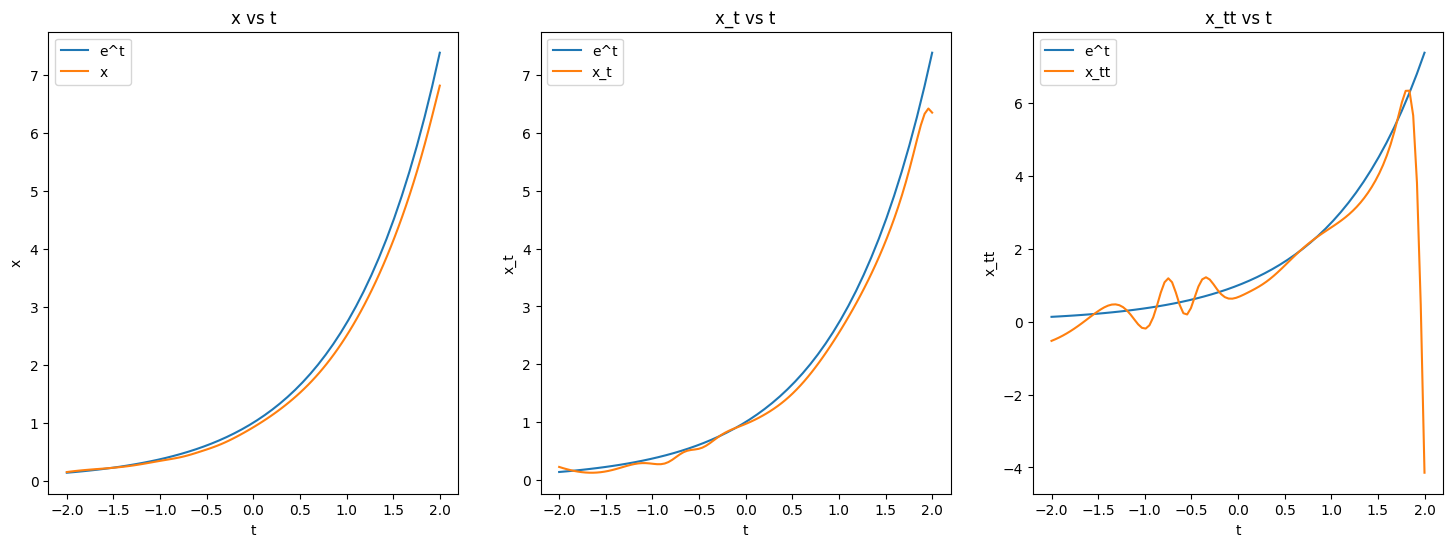

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
t = np.linspace(-2, 2)
ax[0].plot(t, np.exp(t), label="e^t")
ax[1].plot(t, np.exp(t), label="e^t")
ax[2].plot(t, np.exp(t), label="e^t")
pde_model2.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
pde_model2.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
pde_model2.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()